In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [ ]:
df = pd.DataFrame(pd.read_csv("CarPrice_Assignment.csv"))

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.shape

(205, 26)

In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.0,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.00000,205.000000
mean,103.0,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.75122,13276.710571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75%,154.0,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.00000,16503.000000
max,205.0,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.00000,45400.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
sum(df.duplicated(subset = 'car_ID')) == 0

True

In [ ]:
df.isnull().sum()*100/df.shape[0]

car_ID        0.0
symboling     0.0
             ... 
highwaympg    0.0
price         0.0
Length: 26, dtype: float64

In [ ]:
df.price.describe()

count      205.000000
mean     13276.710571
             ...     
75%      16503.000000
max      45400.000000
Name: price, Length: 8, dtype: float64

<Axes: xlabel='price', ylabel='Density'>

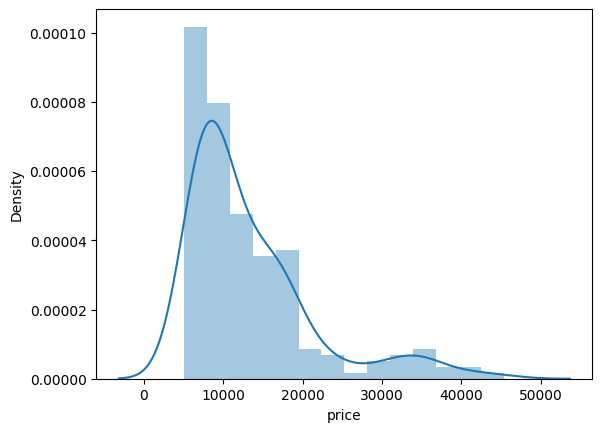

In [ ]:
sns.distplot(df['price'])

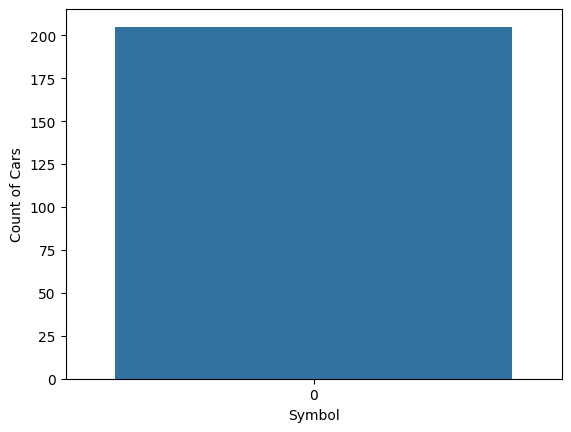

<Figure size 640x480 with 0 Axes>

In [ ]:
plt1 = sns.countplot(df['symboling'])
plt1.set(xlabel = 'Symbol', ylabel= 'Count of Cars')
plt.show()
plt.tight_layout()

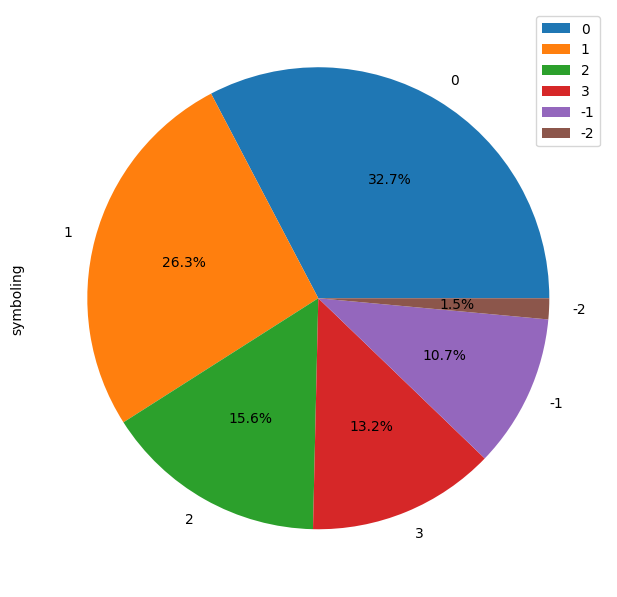

<Figure size 640x480 with 0 Axes>

In [ ]:
df_sym = pd.DataFrame(df['symboling'].value_counts())
df_sym.plot.pie(subplots=True,labels = df_sym.index.values, autopct='%1.1f%%', figsize = (15,7.5))
# Unsquish the pie.
plt.gca().set_aspect('equal')
plt.show()
plt.tight_layout()

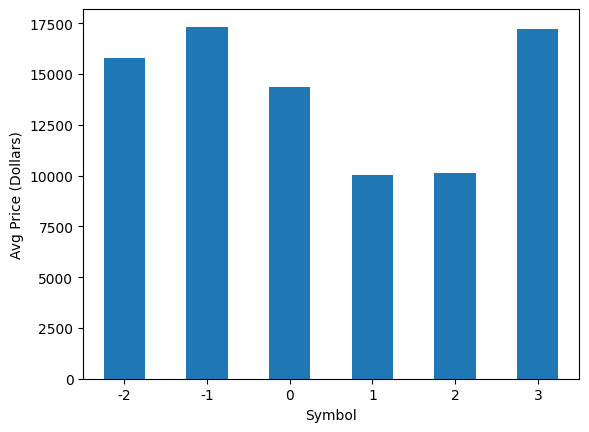

In [ ]:
plt1 = df[['symboling','price']].groupby("symboling").mean().plot(kind='bar',legend = False,)
plt1.set_xlabel("Symbol")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

In [ ]:
df.CarName.values[0:10]

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 100ls', 'audi 5000', 'audi 4000',
       'audi 5000s (diesel)'], dtype=object)

In [ ]:
df['brand'] = df.CarName.str.split(' ').str.get(0).str.upper()

In [ ]:
len(set(df.brand.values))

27

In [ ]:
df.brand.describe()


count        205
unique        27
top       TOYOTA
freq          31
Name: brand, dtype: object

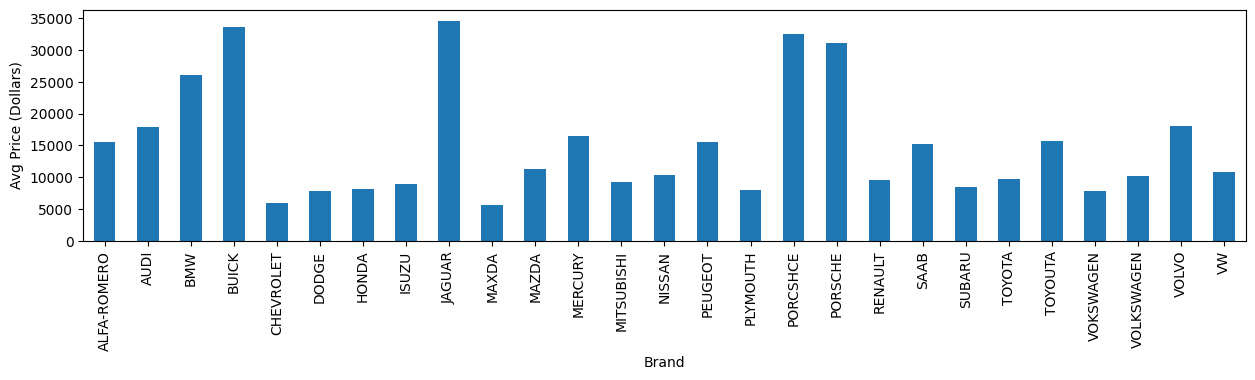

In [ ]:
df_comp_avg_price = df[['brand','price']].groupby("brand", as_index = False).mean().rename(columns={'price':'brand_avg_price'})
plt1 = df_comp_avg_price.plot(x = 'brand', kind='bar',legend = False, sort_columns = True, figsize = (15,3))
plt1.set_xlabel("Brand")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 90)
plt.show()

In [ ]:
df = df.merge(df_comp_avg_price, on = 'brand')

In [ ]:
df['brand_category'] = df['brand_avg_price'].apply(lambda x : "Budget" if x < 10000
                                                     else ("Mid_Range" if 10000 <= x < 20000
                                                           else "Luxury"))

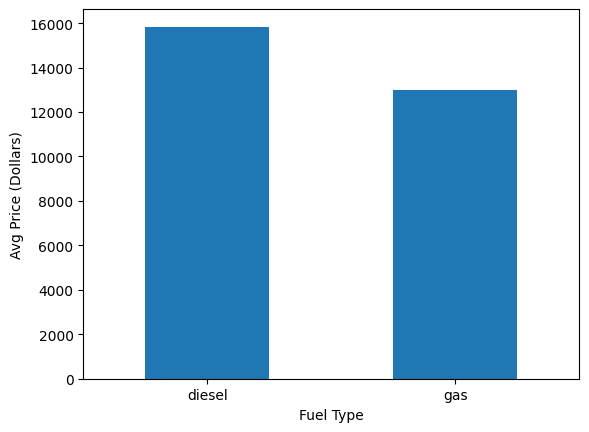

In [ ]:
df_fuel_avg_price = df[['fueltype','price']].groupby("fueltype", as_index = False).mean().rename(columns={'price':'fuel_avg_price'})
plt1 = df_fuel_avg_price.plot(x = 'fueltype', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Fuel Type")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

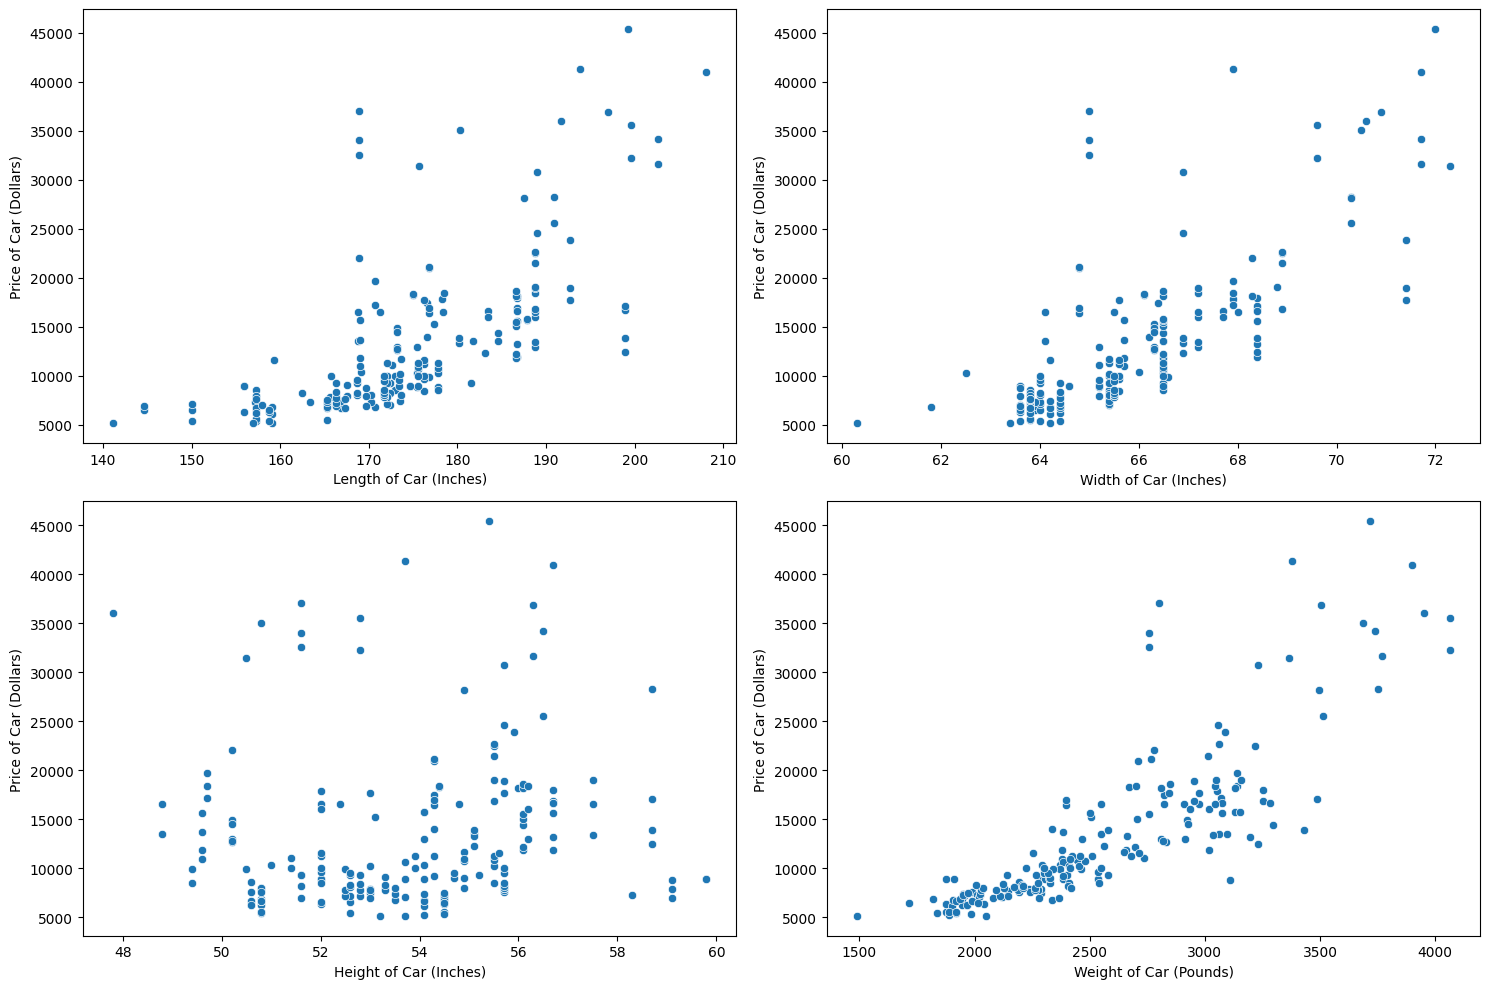

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
plt1 = sns.scatterplot(x = 'carlength', y = 'price', data = df, ax = axs[0,0])
plt1.set_xlabel('Length of Car (Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
plt2 = sns.scatterplot(x = 'carwidth', y = 'price', data = df, ax = axs[0,1])
plt2.set_xlabel('Width of Car (Inches)')
plt2.set_ylabel('Price of Car (Dollars)')
plt3 = sns.scatterplot(x = 'carheight', y = 'price', data = df, ax = axs[1,0])
plt3.set_xlabel('Height of Car (Inches)')
plt3.set_ylabel('Price of Car (Dollars)')
plt3 = sns.scatterplot(x = 'curbweight', y = 'price', data = df, ax = axs[1,1])
plt3.set_xlabel('Weight of Car (Pounds)')
plt3.set_ylabel('Price of Car (Dollars)')
plt.tight_layout()

In [ ]:
auto = df[['fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize',  'boreratio', 'horsepower', 'price', 'brand_category']]

In [ ]:
auto.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price,brand_category
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,13495.0,Mid_Range
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,16500.0,Mid_Range
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,16500.0,Mid_Range
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,13950.0,Mid_Range
4,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,17450.0,Mid_Range


<Figure size 1500x1500 with 0 Axes>

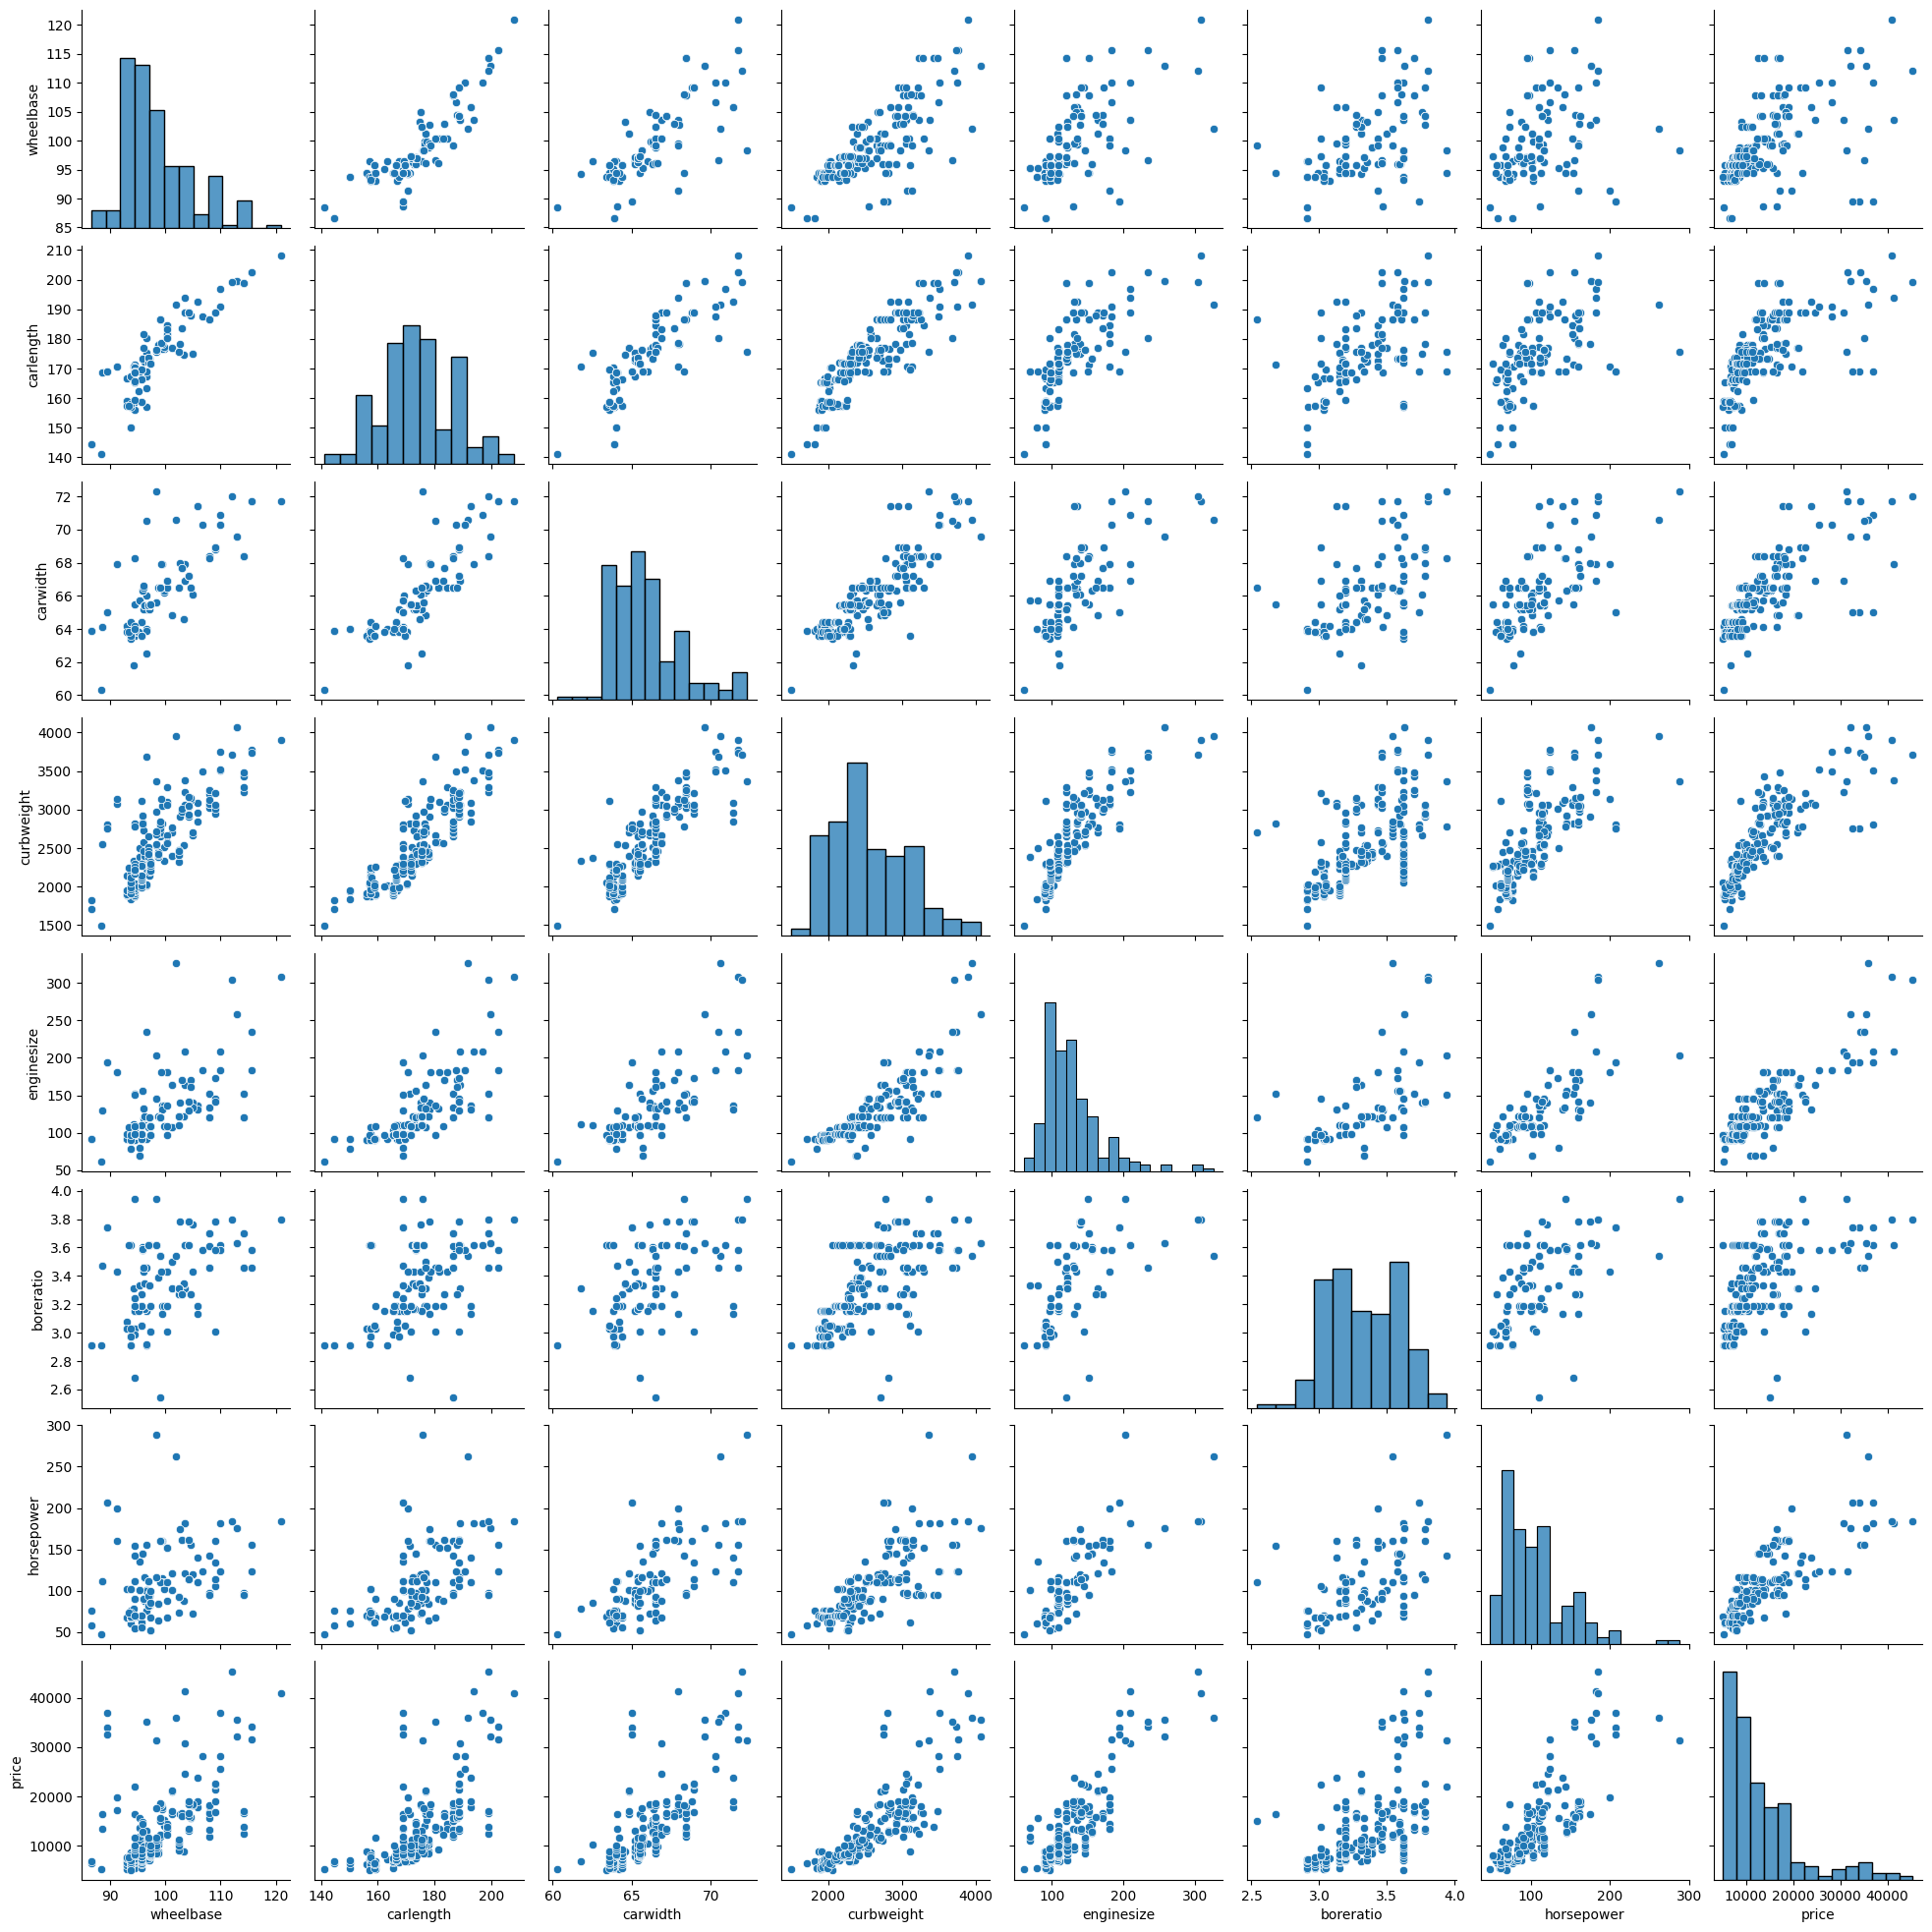

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(auto)
plt.show()